# Introduction
## Rapid EDA
This file, along with others, is part of a series I'm calling Rapid EDA. These Rapid EDAs are 1 hour long exploratory data analyses where I take a dataset and do as much as I can within an hour.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
police_arrests = pd.read_csv('Police_Arrests_20240702.csv')

In [3]:
police_arrests.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00


In [4]:
police_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [14]:
police_arrests.isnull().sum()

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

In [12]:
# Of the crimes commited near the school, what age group?

In [13]:
police_arrests_near_school = police_arrests[police_arrests['Adjacent to School'] == 1]

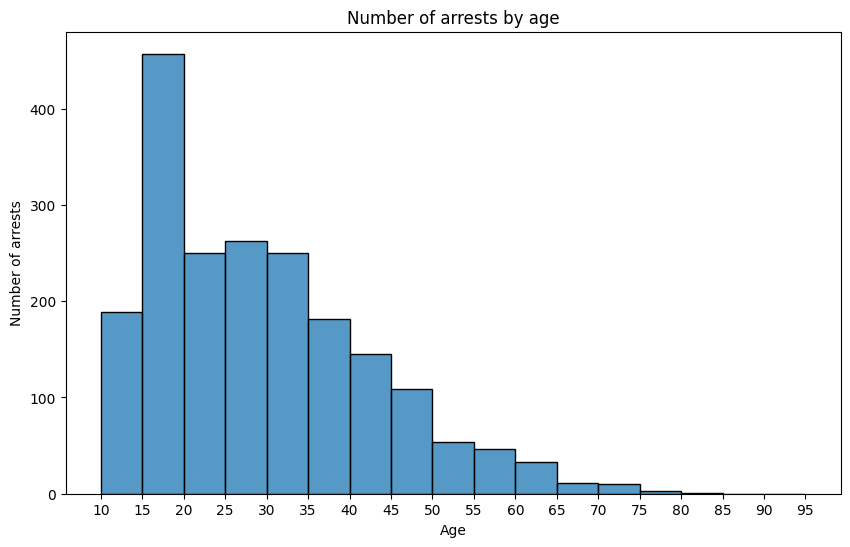

In [30]:
arrests_age = police_arrests_near_school["Subject's age"].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=police_arrests_near_school, x="Subject's age", ax=ax, bins=range(10, 100, 5))
ax.set_title("Number of arrests by age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of arrests")
ax.set_xticks(range(10, 100, 5))
plt.show()

In [39]:
# What race, gender and ethnicity are most commonly arrested in Montgomery County?

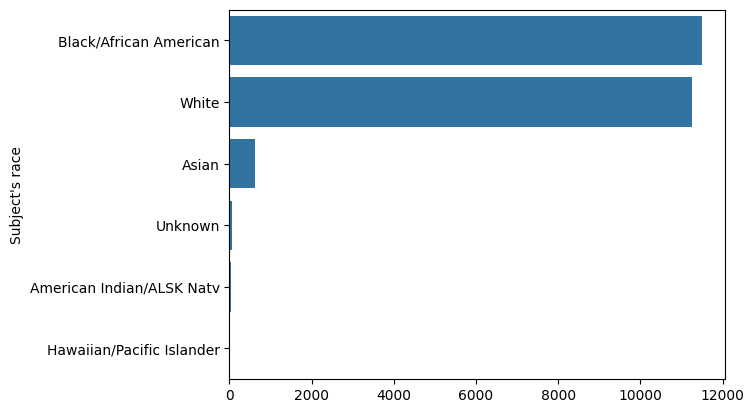

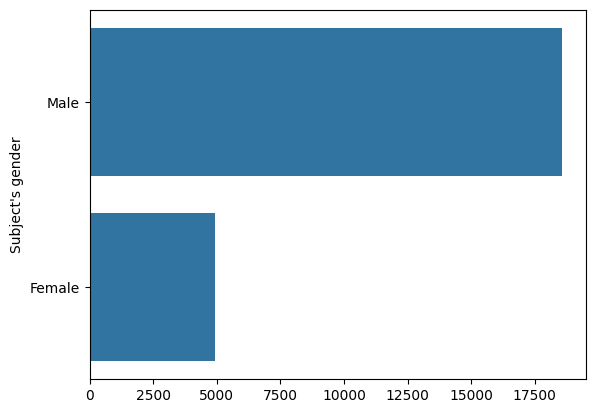

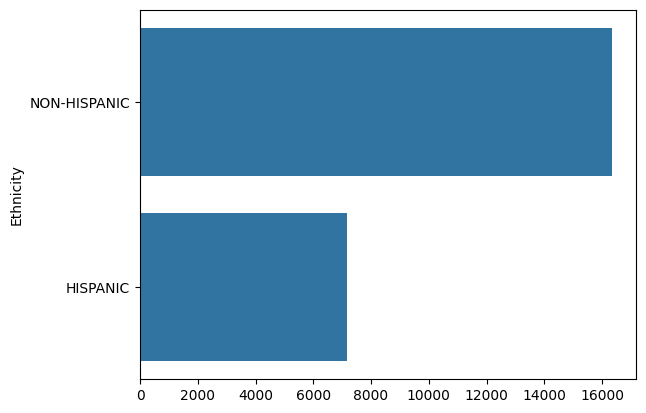

In [40]:
arrests_race = police_arrests["Subject's race"].value_counts()
arrests_gender = police_arrests["Subject's gender"].value_counts()
arrests_ethnicity = police_arrests["Ethnicity"].value_counts()
list = [arrests_race, arrests_gender, arrests_ethnicity]
for i in list:
  sns.barplot(x=i.values, y=i.index)
  plt.show()

In [41]:
# What district has the most arrests?

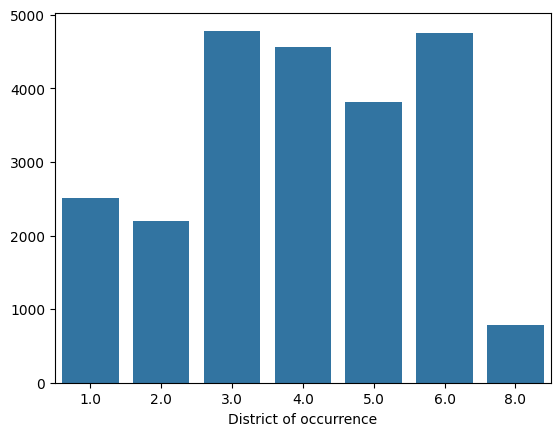

In [51]:
police_arrests_district = police_arrests["District of occurrence"].dropna()
district_arrests_count = police_arrests_district.value_counts()
sns.barplot(x=district_arrests_count.index, y=district_arrests_count.values)
plt.show()

In [52]:
# Which divisions have the most arrests?

<Axes: ylabel='Assigned Division'>

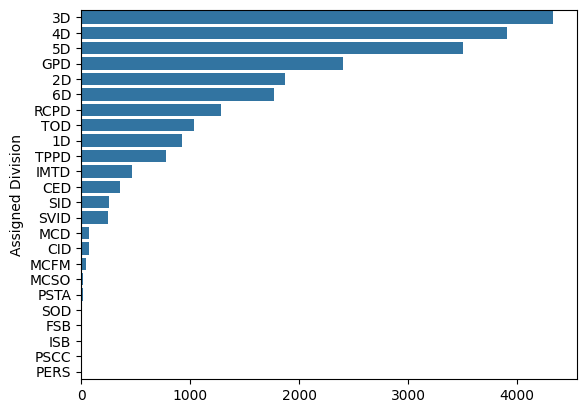

In [54]:
police_arrests_division = police_arrests["Assigned Division"].dropna()
division_arrests_count = police_arrests_division.value_counts()
sns.barplot(x=division_arrests_count.values, y=division_arrests_count.index)